In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')
df.tail(20)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
722,Senior Insurance Data Scientist,$107K-$173K (Glassdoor est.),"What We'll Bring:\n\nAt TransUnion, we have a ...",3.9,TransUnion\n3.9,"Chicago, IL","Chicago, IL",5001 to 10000 employees,1968,Company - Public,...,140.0,TransUnion\n,IL,1,52,1,0,0,0,1
723,Senior Data Science Systems Engineer,$56K-$99K (Glassdoor est.),"MITRE’s Army Concepts, Platforms and Theater O...",3.2,MITRE\n3.2,"Hampton, VA","Bedford, MA",5001 to 10000 employees,1958,Nonprofit Organization,...,77.5,MITRE\n,VA,0,62,0,0,0,0,0
724,ENVIRONMENTAL ENGINEER/SCIENTIST,Employer Provided Salary:$25-$28 Per Hour,"McPhail Associates, LLC is a geotechnical and ...",3.3,Mcphail Associates\n3.3,"Cambridge, MA","Cambridge, MA",1 to 50 employees,1976,Company - Private,...,26.5,Mcphail Associates\n,MA,1,44,0,0,0,0,1
725,Senior Scientist - Regulatory Submissions,$80K-$155K (Glassdoor est.),British American Tobacco\nReynolds American In...,3.1,Reynolds American\n3.1,"Winston-Salem, NC","Winston-Salem, NC",5001 to 10000 employees,1875,Company - Private,...,117.5,Reynolds American\n,NC,1,145,0,0,0,0,1
726,Scientist - Biomarker and Flow Cytometry,$43K-$98K (Glassdoor est.),"Crown Bioscience, a JSR Life Sciences company,...",2.4,Crown Bioscience\n2.4,"San Diego, CA","San Diego, CA",501 to 1000 employees,2006,Company - Private,...,70.5,Crown Bioscience\n,CA,1,14,0,0,0,0,0
727,Revenue Analytics Manager,$45K-$78K (Glassdoor est.),HOVER uses patented technology making it possi...,4.8,HOVER\n4.8,"San Francisco, CA","San Francisco, CA",51 to 200 employees,2011,Company - Private,...,61.5,HOVER\n,CA,1,9,0,0,0,0,1
728,Sr. Scientist Method Development,$50K-$110K (Glassdoor est.),Q2 Solutions is a leading clinical trial labor...,2.9,Q2 Solutions\n2.9,"Marietta, GA","Morrisville, NC",1001 to 5000 employees,2015,Company - Private,...,80.0,Q2 Solutions\n,GA,0,5,0,0,0,0,1
729,"Associate Scientist, LC/MS Biologics",$44K-$96K (Glassdoor est.),Q2 Solutions is a leading clinical trial labor...,2.9,Q2 Solutions\n2.9,"Ithaca, NY","Morrisville, NC",1001 to 5000 employees,2015,Company - Private,...,70.0,Q2 Solutions\n,NY,0,5,0,0,0,0,1
730,"Research Scientist, Immunology - Cancer Biology",Employer Provided Salary:$100K-$140K,"Research Scientist, Immunology - Cancer Biolog...",-1.0,Kronos Bio,"Cambridge, MA","San Mateo, CA",Unknown,-1,Company - Private,...,120.0,Kronos Bio,MA,0,-1,0,0,0,0,1
731,IT - Data Engineer II,$61K-$119K (Glassdoor est.),IT - Data Engineer II\n\nThe Data Engineer II ...,3.4,Arbella Insurance\n3.4,"Quincy, MA","Quincy, MA",1001 to 5000 employees,1988,Company - Private,...,90.0,Arbella Insurance\n,MA,1,32,0,0,1,0,1


In [3]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
        
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
        
## job title and seniority

## Fix state los angeles

## job description length

## Competitor count

## hourly wage to annual

## remove new line from job title
    

In [4]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)
df['job_simp'].value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
mle                22
manager            22
director           14
Name: job_simp, dtype: int64

In [5]:
df['seniority'] = df['Job Title'].apply(seniority)
df['seniority'].value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [6]:
## Fix state los angeles

df['job_state'] = df['job_state'].apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')

In [7]:
## job description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))

In [8]:
## Competitor count
df['num_count'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)


In [9]:
## hourly wage to annual
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary,axis = 1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary,axis = 1)

In [10]:
## remove new line from job title
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('/n',''))

In [11]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_count
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


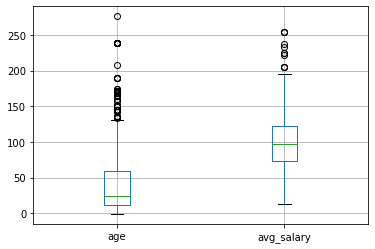

In [12]:
df.boxplot(column = ['age','avg_salary'])

In [13]:
corr = df[['age','avg_salary','Rating','desc_len']].corr()

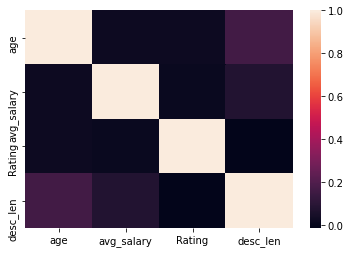

In [14]:
sns.heatmap(corr)

In [15]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_count'],
      dtype='object')

In [16]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt','job_state','spark', 'aws', 'excel', 'job_simp', 'seniority']]


graph for Location: samples = 200 


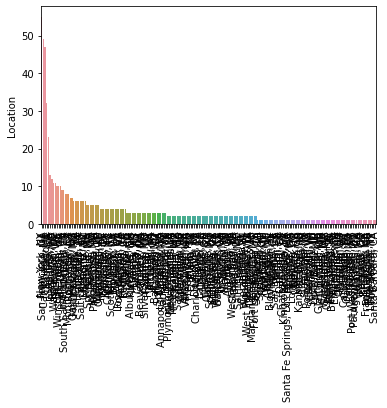

graph for Headquarters: samples = 198 


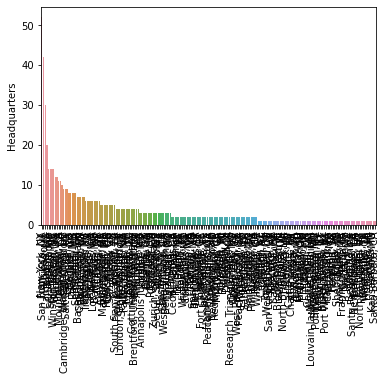

graph for Size: samples = 9 


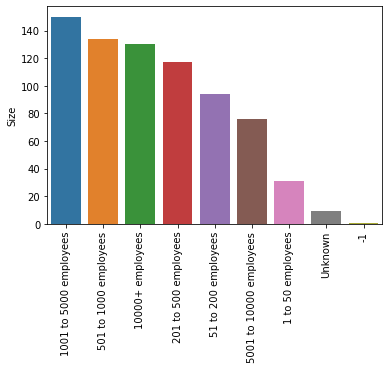

graph for Type of ownership: samples = 11 


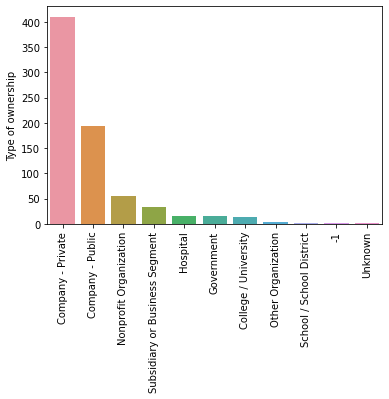

graph for Industry: samples = 60 


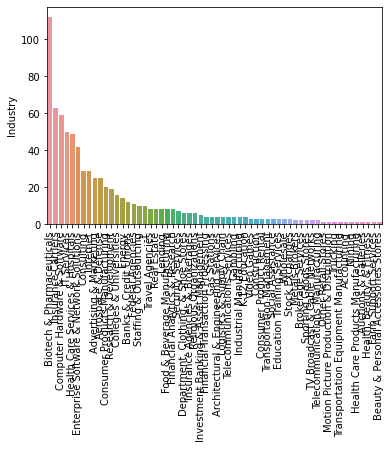

graph for Sector: samples = 25 


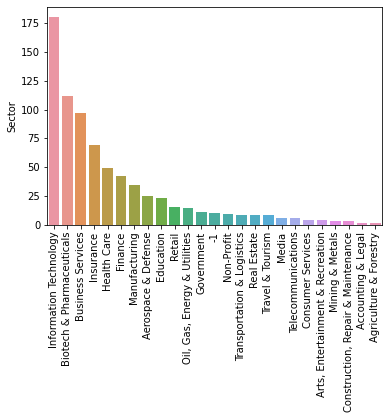

graph for Revenue: samples = 14 


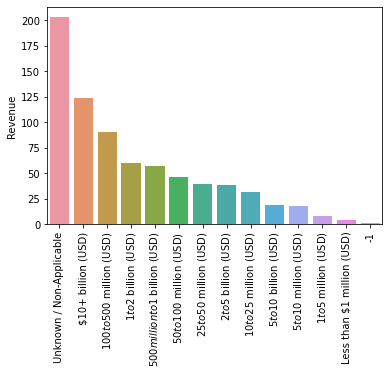

graph for company_txt: samples = 343 


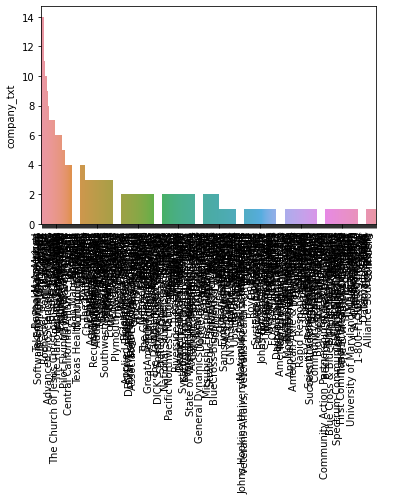

graph for job_state: samples = 37 


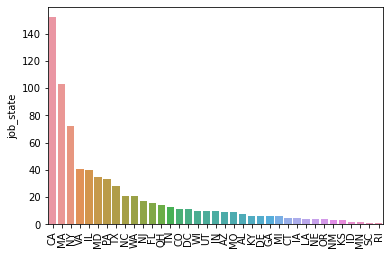

graph for spark: samples = 2 


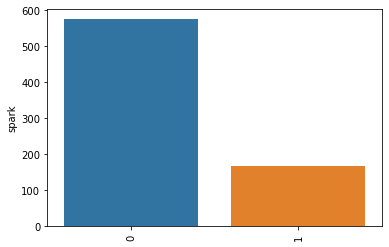

graph for aws: samples = 2 


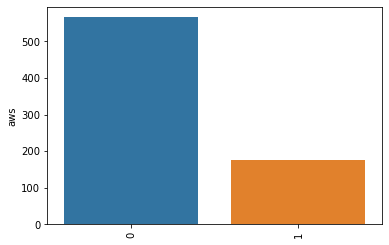

graph for excel: samples = 2 


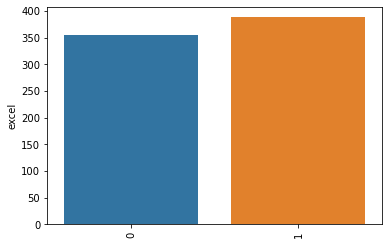

graph for job_simp: samples = 7 


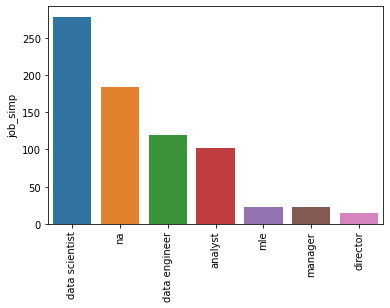

graph for seniority: samples = 3 


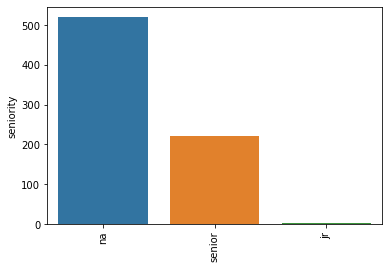

In [17]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: samples = %d "% (i,len(cat_num)))
    chart = sns.barplot(x = cat_num.index,y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation =90)
    plt.show()

graph for Location: samples = 20 


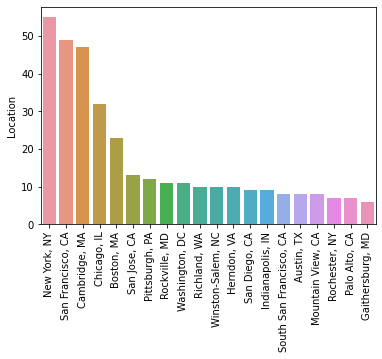

graph for Headquarters: samples = 20 


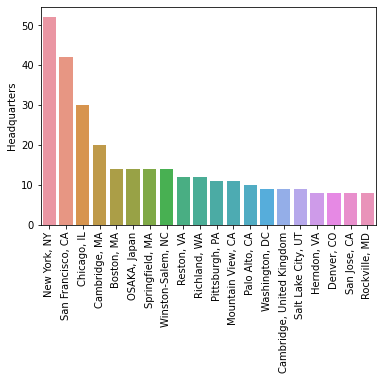

graph for company_txt: samples = 20 


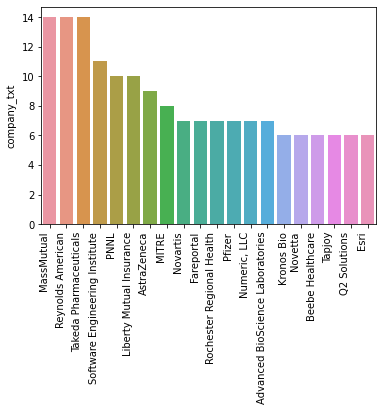

In [18]:
for i in df_cat[['Location', 'Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: samples = %d "% (i,len(cat_num)))
    chart = sns.barplot(x = cat_num.index,y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation =90)
    plt.show()

In [19]:

pd.pivot_table(df,index = ['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [20]:
pd.set_option('display.max_rows',None)
pd.pivot_table(df,index = ['job_state','job_simp'],values = 'avg_salary',aggfunc = 'count').sort_values('job_state',ascending = False)

avg_salary
job_state job_simp                  
WI        na                       4
          data scientist           3
          analyst                  3
WA        na                       1
          data scientist          17
          analyst                  3
VA        na                       5
          mle                      2
          data scientist          18
          data engineer           10
          analyst                  6
UT        data engineer            3
          analyst                  4
          data scientist           3
TX        na                       7
          data scientist          13
          data engineer            8
TN        data scientist           1
          data engineer           10
          analyst                  2
SC        na                       1
RI        analyst                  1
PA        manager                  3
          data engineer            1
          data scientist           6
          analyst                  8
          mle                      7
          na                       8
OR        data scientist           3
          data engineer            1
OH        na                       3
          data scientist           7
          analyst                  4
NY        na                      12
          mle                      2
          data scientist          40
          data engineer            4
          analyst                 14
NM        data scientist           3
NJ        data scientist           4
          analyst                  6
          data engineer            2
          manager                  2
          director                 2
          na                       1
NE        na                       4
NC        na                      12
          data scientist           3
          data engineer            6
MO        na                       3
          manager                  1
          data scientist           3
          analyst                  2
MN        data engineer            1
          analyst                  1
MI        manager                  2
          data scientist           4
MD        na                      16
          data scientist          13
          data engineer            3
          analyst                  3
MA        na                      46
          manager                  5
          director                 6
          data scientist          30
          data engineer           12
          analyst                  4
LA        analyst                  1
          data engineer            2
          na                       1
KY        na                       4
          data scientist           2
KS        mle                      3
IN        na                       4
          data scientist           2
          data engineer            4
IL        analyst                  3
          na                       6
          mle                      2
          director                 6
          data scientist          15
          data engineer            8
ID        analyst                  2
IA        analyst                  2
          data engineer            3
GA        data scientist           3
          na                       3
FL        data scientist           7
          data engineer            3
          analyst                  6
DE        na                       6
DC        data scientist           5
          data engineer            4
          analyst                  2
CT        na                       3
          data scientist           2
CO        mle                      1
          data engineer            3
          analyst                  1
          na                       3
          data scientist           3
CA        na                      27
          mle                      5
          manager                  9
          data scientist          68
          data engineer           25
          analyst             

In [21]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_count'],
      dtype='object')

In [22]:
df_pivots = df[['Rating','Industry', 'Sector', 'Revenue','hourly', 'employer_provided','python_yn', 'R_yn',
       'spark', 'aws', 'excel','Type of ownership','avg_salary']]

In [27]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index = i,values = 'avg_salary'))

Rating
        avg_salary
Rating            
-1.0    136.181818
 1.9     87.500000
 2.1     95.900000
 2.2     97.750000
 2.3     81.500000
 2.4     60.214286
 2.5    120.000000
 2.6    109.083333
 2.7     83.250000
 2.8     83.928571
 2.9     81.138889
 3.0     85.588235
 3.1     86.580000
 3.2    105.500000
 3.3    101.858974
 3.4     93.011364
 3.5    104.897959
 3.6     85.467391
 3.7    104.131148
 3.8     96.811475
 3.9    113.071429
 4.0    105.340426
 4.1    116.368421
 4.2    100.442308
 4.3    102.468750
 4.4    108.606061
 4.5    117.714286
 4.6     97.250000
 4.7    103.983871
 4.8     80.277778
 5.0    134.700000
Industry
                                          avg_salary
Industry                                            
-1                                        114.650000
Accounting                                113.500000
Advertising & Marketing                   104.300000
Aerospace & Defense                        99.060000
Architectural & Engineering Services   

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [28]:
pd.pivot_table(df_pivots,index = 'Revenue',columns = 'python_yn',values = 'avg_salary',aggfunc ='count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0
